# Importing movie data and first glimpsse

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# import data sets (column names are based on readme file of data set publisher)
character_metadata = pd.read_csv('./data/character.metadata.tsv', sep='\t', names=[
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID',
])
movie_metadata = pd.read_csv('./data/movie.metadata.tsv', sep='\t', names=[
    'Wikipedia movie ID', 
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages (Freebase ID:name tuples)',
    'Movie countries (Freebase ID:name tuples)',
    'Movie genres (Freebase ID:name tuples)'
])
name_cluster = pd.read_csv('./data/name.clusters.txt', sep='\t', names=['Name', 'Freebase ID']) # maybe wrong column names?
plot_summaries = pd.read_csv('./data/plot_summaries.txt', sep='\t', names=['Wikipedia movie ID', 'Summary'])
tvtropes_cluster = pd.read_csv('./data/tvtropes.clusters.txt', sep='\t', names=['Type', 'Freebase character/actor map ID']) # maybe wrong column names?

# variableto be able to iterate over all data sets
data_sets = [
    {'name' : 'character_metadata', 'data' : character_metadata},
    {'name' : 'movie_metadata', 'data' : movie_metadata}, 
    {'name' : 'name_cluster', 'data' : name_cluster},
    {'name' : 'plot_summaries', 'data' : plot_summaries},
    {'name' : 'tvtropes_cluster', 'data' : tvtropes_cluster}
]

In [8]:
# first glimpse of each data set and soome basic stats
for data_set in data_sets:
    print('data set:', data_set['name'])
    print('shape:', data_set['data'].shape)
    print('first five rows:\n', data_set['data'].head())
    print('description:\n', data_set['data'].describe(include='all'))
    print('\n\n')

data set: character_metadata
shape: (450669, 13)
first five rows:
    Wikipedia movie ID Freebase movie ID Movie release date  \
0              975900         /m/03vyhn         2001-08-24   
1              975900         /m/03vyhn         2001-08-24   
2              975900         /m/03vyhn         2001-08-24   
3              975900         /m/03vyhn         2001-08-24   
4              975900         /m/03vyhn         2001-08-24   

               Character name Actor date of birth Actor gender  \
0                    Akooshay          1958-08-26            F   
1  Lieutenant Melanie Ballard          1974-08-15            F   
2         Desolation Williams          1969-06-15            M   
3          Sgt Jericho Butler          1967-09-12            M   
4             Bashira Kincaid          1977-09-25            F   

   Actor height (in meters) Actor ethnicity (Freebase ID)          Actor name  \
0                     1.620                           NaN      Wanda De Jesus   
1

# Pre-processsing

In [9]:
# standardizing release date columns so that is only showing the year (essential since many entries only reveal the year and some a complete date)
movie_metadata['Movie release date'] = movie_metadata['Movie release date'].str.slice(0, 4)

# NaNs values
print('percentage of NaNs in "Movie release date" column:', movie_metadata['Movie release date'].isna().sum()/movie_metadata['Movie release date'].size)
movie_metadata.head()

percentage of NaNs in "Movie release date" column: 0.08443743042047443


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


# Analysis of "Movie release date"

/var/folders/dk/kt0tgs8j1cb1k_hn1_h2bch80000gn/T/ipykernel_20969/65190948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_metadata_release_date_analysis['Movie release date'] = movie_metadata_release_date_analysis['Movie release date'].astype(int) #essential for plotting


oldest movie(s) from: 1010
newest movie(s) from: 2016
histogram [[<AxesSubplot: title={'center': 'Movie release date'}>]]
boxplot AxesSubplot(0.125,0.11;0.775x0.77)


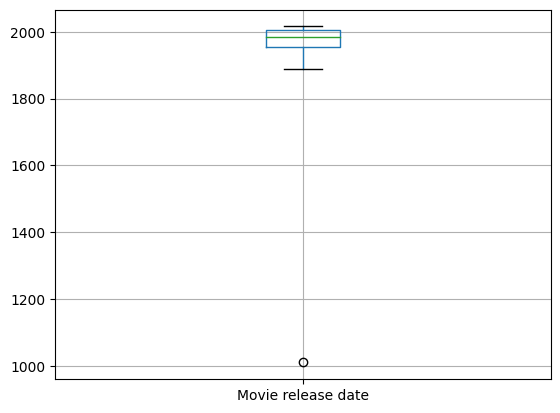

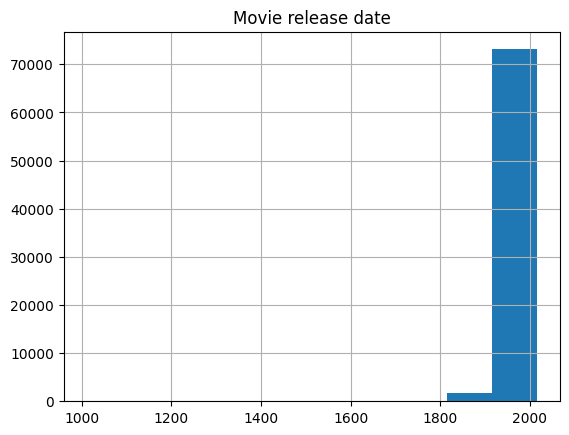

In [15]:
# basic stats about movie release year column
movie_metadata['Movie release date'].describe(include='all')

# visualise amount of movies per year
movie_metadata_release_date_analysis = movie_metadata.dropna(subset=['Movie release date']) # erase rows with NaNs
movie_metadata_release_date_analysis['Movie release date'] = movie_metadata_release_date_analysis['Movie release date'].astype(int) #essential for plotting
print('oldest movie(s) from:', movie_metadata_release_date_analysis['Movie release date'].min())
print('newest movie(s) from:', movie_metadata_release_date_analysis['Movie release date'].max())

boxplot_movies_over_time = movie_metadata_release_date_analysis.boxplot(column='Movie release date')
movies_per_year = movie_metadata_release_date_analysis.hist(column='Movie release date')
print('histogram', movies_per_year)
print('boxplot', boxplot_movies_over_time) #--> reveals faulty values due to existance of extreme outliers